In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
import urllib.request
from PIL import Image
from io import BytesIO
from re import sub, match
from wordcloud import WordCloud, ImageColorGenerator
from random import shuffle
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import os
import string as s
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('wordnet')
pd.set_option('display.max_rows',1000) 
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
df = pd.read_csv("/content/gdrive/My Drive/DA project folder/goodreads_books.csv")

In [40]:
df.head()

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597,196,4.03,3045,2323,1748,389,92,220.0,January 1st 2007,Simon Schuster Books for Young Readers,Inner Circle,"Young Adult 161, Mystery 45, Romance 32",1416950419,9781416950417,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179,177,4.35,2255,1290,518,93,23,400.0,October 29th 2006,Thomas Nelson,NaN,"Christian Fiction 114, Christian 45, Fiction 3...",1595542329,9781595542328,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,..."
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288,218,4.23,3000,2020,1041,183,44,320.0,January 1st 2009,Zondervan,Take Two,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382,1424,4.01,12711,15407,8511,1429,324,464.0,1997,Tor Books,Reliquary,"Thriller 626, Mystery 493, Horror 432, Fiction...",0765354950,9780765354952,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168,3217,4.04,27594,25219,14855,3414,1086,258.0,October 28th 1995,Gallery Books,The Millionaire Next Door: The Surprising Secr...,"Economics-Finance 1162, Nonfiction 910, Busine...",0671015206,9780671015206,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...


In [41]:
df.columns

Index(['id', 'title', 'link', 'series', 'cover_link', 'author', 'author_link',
       'rating_count', 'review_count', 'average_rating', 'five_star_ratings',
       'four_star_ratings', 'three_star_ratings', 'two_star_ratings',
       'one_star_ratings', 'number_of_pages', 'date_published', 'publisher',
       'original_title', 'genre_and_votes', 'isbn', 'isbn13', 'asin',
       'settings', 'characters', 'awards', 'amazon_redirect_link',
       'worldcat_redirect_link', 'recommended_books', 'books_in_series',
       'description'],
      dtype='object')

In [42]:
df= df.drop(['worldcat_redirect_link','amazon_redirect_link', 'author_link'],axis=1)

In [43]:
df= df.drop(['link','cover_link'],axis=1)

In [44]:
df.columns

Index(['id', 'title', 'series', 'author', 'rating_count', 'review_count',
       'average_rating', 'five_star_ratings', 'four_star_ratings',
       'three_star_ratings', 'two_star_ratings', 'one_star_ratings',
       'number_of_pages', 'date_published', 'publisher', 'original_title',
       'genre_and_votes', 'isbn', 'isbn13', 'asin', 'settings', 'characters',
       'awards', 'recommended_books', 'books_in_series', 'description'],
      dtype='object')

In [45]:
df.describe()

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages
count,5.219900e+04,5.219900e+04,52199.000000,52199.000000,5.219900e+04,5.219900e+04,52199.000000,52199.000000,52199.000000,49869.000000
mean,1.015443e+07,1.887361e+04,1012.980881,4.020610,7.817176e+03,6.250785e+03,3456.512424,935.496600,413.640051,328.942730
std,1.164443e+07,1.163978e+05,4054.802421,0.367161,5.876373e+04,3.473533e+04,18249.298631,5890.077215,3843.356500,252.790119
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.628190e+05,3.400000e+02,31.000000,3.820000,1.170000e+02,1.090000e+02,63.000000,15.000000,6.000000,210.000000
50%,6.383537e+06,2.295000e+03,163.000000,4.030000,8.100000e+02,7.650000e+02,452.000000,107.000000,36.000000,304.000000
75%,1.738060e+07,9.297500e+03,622.000000,4.230000,3.375500e+03,3.190500e+03,1866.000000,450.000000,151.000000,392.000000
max,5.444299e+07,6.801077e+06,169511.000000,5.000000,4.414877e+06,1.868421e+06,980183.000000,529060.000000,537793.000000,14777.000000


In [46]:
df.isnull().sum()

id                        0
title                     0
series                28880
author                    0
rating_count              0
review_count              0
average_rating            0
five_star_ratings         0
four_star_ratings         0
three_star_ratings        0
two_star_ratings          0
one_star_ratings          0
number_of_pages        2330
date_published          860
publisher              3636
original_title        12949
genre_and_votes        2840
isbn                  11883
isbn13                12692
asin                  46963
settings              40684
characters            38504
awards                41573
recommended_books      3994
books_in_series       30121
description            2575
dtype: int64

In [47]:
df=df.dropna(subset=['genre_and_votes'])

In [48]:
df.reset_index(inplace = True)

In [49]:
df.isnull().sum()

index                     0
id                        0
title                     0
series                26366
author                    0
rating_count              0
review_count              0
average_rating            0
five_star_ratings         0
four_star_ratings         0
three_star_ratings        0
two_star_ratings          0
one_star_ratings          0
number_of_pages        1874
date_published          652
publisher              3028
original_title        10885
genre_and_votes           0
isbn                  10313
isbn13                10988
asin                  44909
settings              37911
characters            35711
awards                38773
recommended_books      2200
books_in_series       27418
description            2220
dtype: int64

In [51]:
df.dtypes

index                   int64
id                      int64
title                  object
series                 object
author                 object
rating_count            int64
review_count            int64
average_rating        float64
five_star_ratings       int64
four_star_ratings       int64
three_star_ratings      int64
two_star_ratings        int64
one_star_ratings        int64
number_of_pages       float64
date_published         object
publisher              object
original_title         object
genre_and_votes        object
isbn                   object
isbn13                 object
asin                   object
settings               object
characters             object
awards                 object
recommended_books      object
books_in_series        object
description            object
dtype: object

In [52]:
df.five_star_ratings= pd.to_numeric(df.five_star_ratings,errors='coerce')
book_title= df['title'].astype('str')  
print(book_title)

0                                             Inner Circle
1                                        A Time to Embrace
2                                                 Take Two
3                                                Reliquary
4        The Millionaire Next Door: The Surprising Secr...
                               ...                        
49354                               The Stranger I Married
49355       The Opposite of Loneliness: Essays and Stories
49356                                    Sadako will leben
49357                                          Confessions
49358                        Going Rogue: An American Life
Name: title, Length: 49359, dtype: object


In [53]:

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 16 categorical variables

The categorical variables are :

 ['title', 'series', 'author', 'date_published', 'publisher', 'original_title', 'genre_and_votes', 'isbn', 'isbn13', 'asin', 'settings', 'characters', 'awards', 'recommended_books', 'books_in_series', 'description']


In [54]:
def populate_genre_cols(df, genre):
    book_genres = df["genre_and_votes"]
    if type(book_genres) == type(float('nan')):
        return None
    genre_list = book_genres.split(",")
    for i in genre_list:
        if genre == " ".join(i.split()[:-1]):
            return int(i.split()[-1].replace("user", ""))
    return None
        
genre_count = {}

for i in df["genre_and_votes"]:
    if type(i) != type(float('nan')):
        book_genres = [" ".join(j.split()[:-1]) for j in i.split(",")]
        for j in book_genres:
            if j not in genre_count.keys():
                genre_count[j] = 1
            else:
                genre_count[j] += 1
                
genres_to_use = set()

for k, v in genre_count.items():
    if v >= 1000:
        genres_to_use.add(k)

for i in genres_to_use:
    df[i.lower().replace(" ", "_")] = df.apply(populate_genre_cols, genre=i, axis=1)

print("Percentage of books with specific genre listed")
for i in genres_to_use:
    i = i.lower().replace(" ", "_")
    print(f"{i}: {round(df[i].notna().sum() / df.shape[0] * 100, 2)}%")

Percentage of books with specific genre listed
humor: 4.67%
childrens-middle_grade: 3.72%
suspense: 2.92%
fantasy-paranormal: 9.37%
adventure: 5.27%
childrens: 7.36%
fiction: 50.35%
horror: 4.38%
science_fiction: 8.14%
romance: 24.99%
science_fiction-dystopia: 2.34%
christian_fiction: 2.13%
young_adult: 19.24%
contemporary: 12.82%
new_adult: 3.03%
fantasy: 24.69%
classics: 9.81%
biography: 5.01%
novels: 5.39%
mystery-crime: 4.41%
historical: 8.0%
sequential_art-graphic_novels: 3.29%
adult: 3.97%
philosophy: 3.86%
autobiography-memoir: 3.54%
religion: 3.13%
romance-historical_romance: 2.03%
nonfiction: 16.56%
literature: 4.74%
audiobook: 3.77%
romance-contemporary_romance: 4.62%
mystery: 11.22%
politics: 2.23%
psychology: 2.04%
romance-paranormal_romance: 3.83%
thriller: 6.28%
history: 5.97%
science: 2.07%
womens_fiction-chick_lit: 3.69%
historical-historical_fiction: 12.17%
realistic_fiction: 2.67%
poetry: 2.73%
fantasy-urban_fantasy: 3.69%
adult_fiction-erotica: 2.36%
sequential_art-c

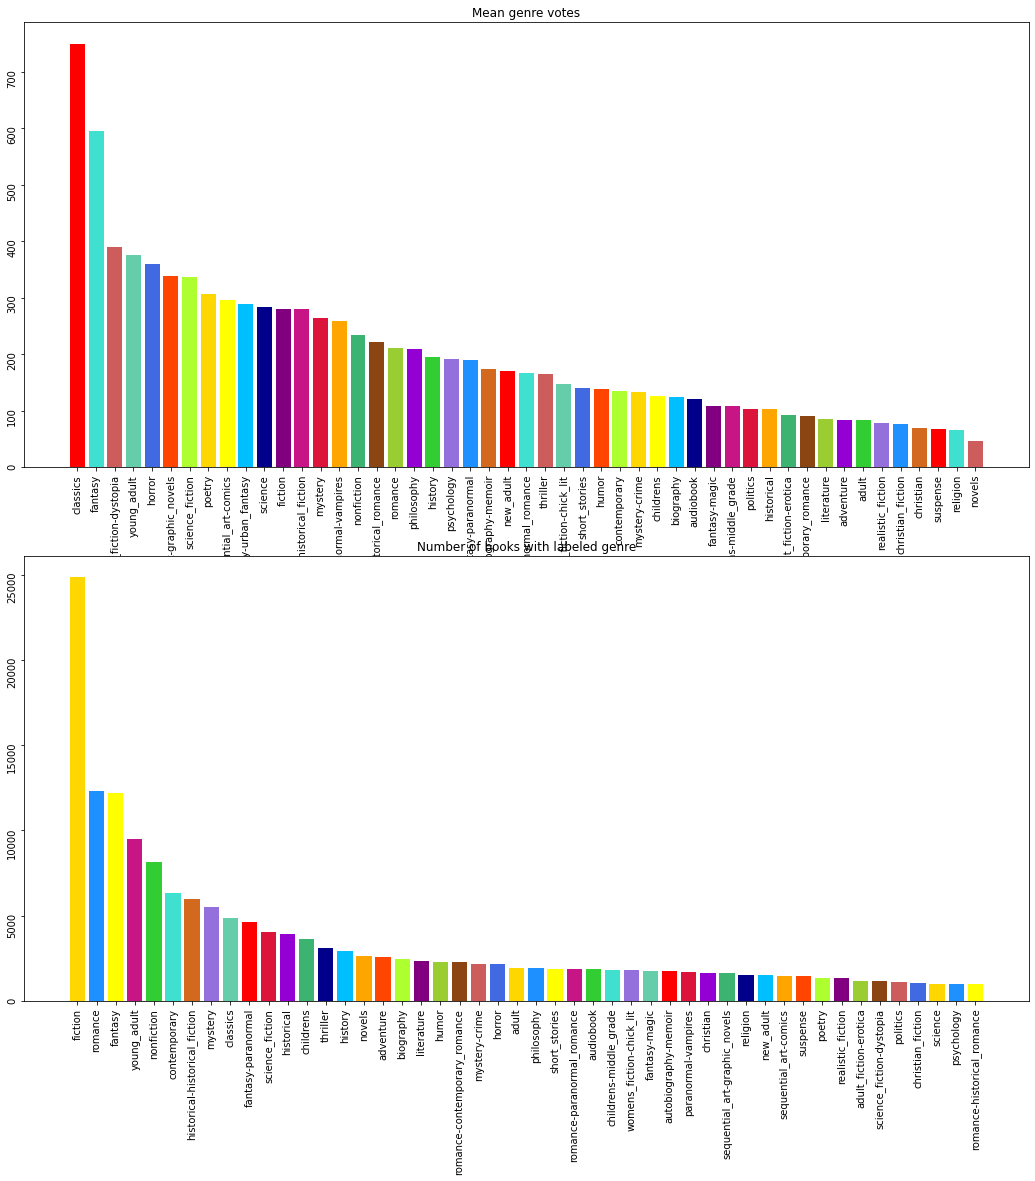

In [55]:
base_colors = ["indianred", "red", "orangered", "chocolate", "saddlebrown",
          "orange", "gold", "yellow", "yellowgreen", "greenyellow", "limegreen",
          "mediumseagreen", "mediumaquamarine", "turquoise", "deepskyblue", "dodgerblue",
          "royalblue", "darkblue", "mediumpurple", "darkviolet", "purple", "mediumvioletred",
          "crimson"]

genre_df = df[[i.lower().replace(" ", "_") for i in genres_to_use]]
unique_genres = genre_df.columns
shuffle(base_colors)
fig, ax = plt.subplots(2, figsize=(18,18))

mean_genres = genre_df.mean().tolist()
sorted_mean_genres = mean_genres.copy()
sorted_mean_genres.sort()
sorted_mean_genres.reverse()
sorted_mean_genre_str = [None for i in range(len(sorted_mean_genres))]
for i in range(len(sorted_mean_genres)):
    sorted_mean_genre_str[i] = unique_genres[mean_genres.index(sorted_mean_genres[i])]
ax[0].bar(sorted_mean_genre_str, sorted_mean_genres, color = base_colors)
ax[0].set_title("Mean genre votes")
ax[0].tick_params(labelrotation=90)


shuffle(base_colors)
present_genres = genre_df[genre_df != 0].count().tolist()
sorted_present_genres = present_genres.copy()
sorted_present_genres.sort()
sorted_present_genres.reverse()
sorted_present_genres_str = [None for i in range(len(sorted_present_genres))]
for i in range(len(sorted_present_genres)):
    sorted_present_genres_str[i] = unique_genres[present_genres.index(sorted_present_genres[i])]
ax[1].bar(sorted_present_genres_str, sorted_present_genres, color = base_colors)
ax[1].set_title("Number of books with labeled genre")
ax[1].tick_params(labelrotation=90)

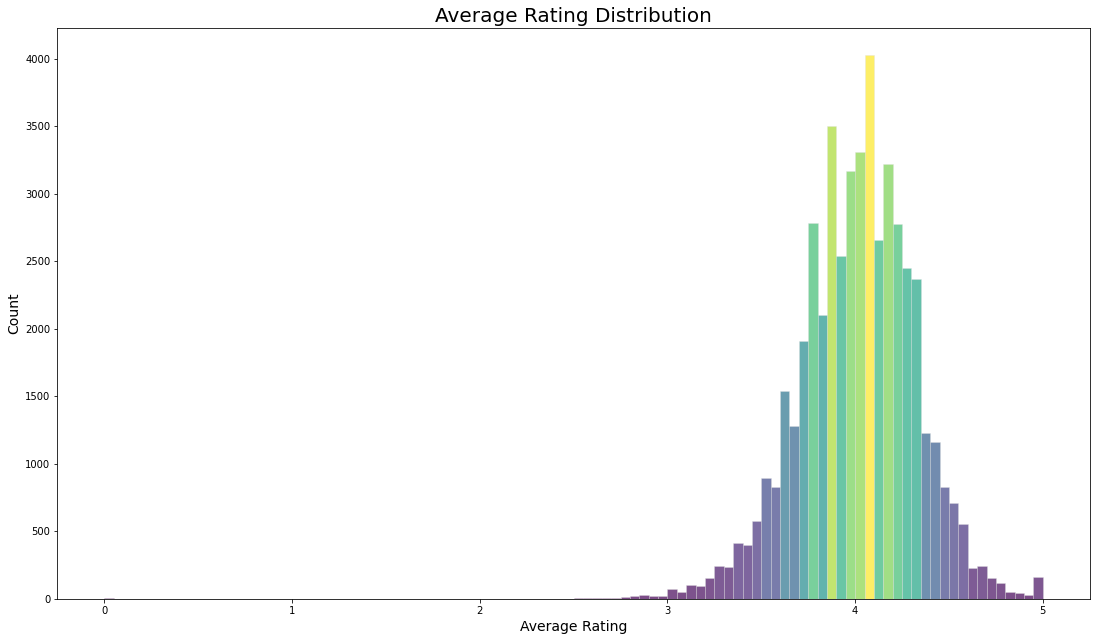

In [56]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
n, bins, patches = plt.hist(df['average_rating'], bins=100, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
n = n.astype('int') # it MUST be integer
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
plt.title('Average Rating Distribution', fontsize=20)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

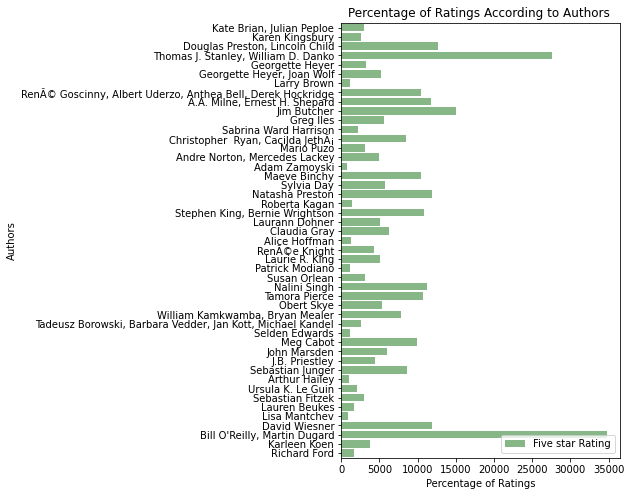

In [57]:
# Percentage of Ratings According to Authors
data1=df.head(50)
author_list= list(data1['author'].unique())

ratings1= []
#ratings2= []
for i in author_list:
    
    x = data1[data1['author']==i]
    ratings1.append(sum(x.five_star_ratings)/len(x))
    #ratings2.append(sum(x.four_star_ratings)/len(x))
    
f,ax = plt.subplots(figsize = (5,8))
sn.barplot(x=ratings1,y=author_list,color='green',alpha = 0.5,label='Five star Rating' )
#sn.barplot(x=ratings2,y=author_list,color='blue',alpha = 0.5,label='Rating2' )
ax.legend(loc='lower right',frameon = True)   
ax.set(xlabel='Percentage of Ratings', ylabel='Authors',title = "Percentage of Ratings According to Authors ")
plt.show()

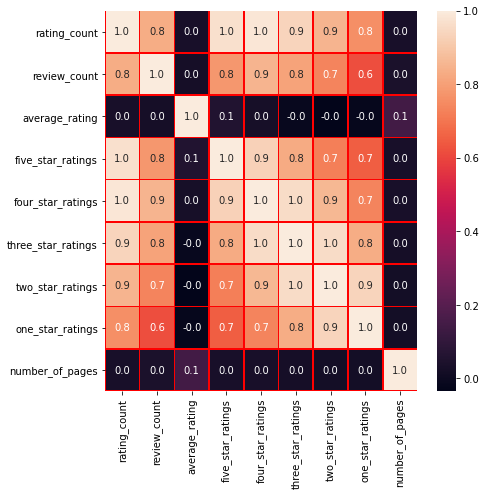

In [58]:
data2= df[['rating_count','review_count','average_rating','five_star_ratings','four_star_ratings','three_star_ratings','two_star_ratings','one_star_ratings','number_of_pages']]
f,ax = plt.subplots(figsize=(7,7))
sn.heatmap(data2.corr(), annot=True, linewidths=0.6,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

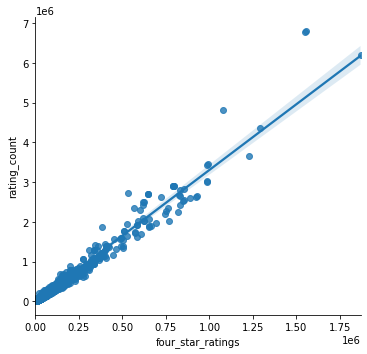

In [59]:
sn.lmplot(x="four_star_ratings", y="rating_count", data=data2)
plt.show()

In [60]:
def plot_books_by(df, col, n_rows=10):
    plt.figure(figsize=(12,7))
    ax = sn.barplot(x=df[col].head(n_rows), y=df['title'].head(n_rows), data=df)
    plt.title('Best ' + str(n_rows) + ' books by ' + col.replace('_',' ').capitalize(), weight='bold')
    plt.xlabel('Score of ' + col)
    plt.ylabel('Book Title')

In [61]:
important_columns = ['title','author','average_rating','rating_count']
book_sorted_ratings = df[df['rating_count']>=1000].sort_values('average_rating', ascending=False)
book_sorted_ratings[important_columns].head(15)

,title,author,average_rating,rating_count
39042,The Complete Calvin and Hobbes,Bill Watterson,4.82,34379
14206,"The Way of Kings, Part 2",Brandon Sanderson,4.79,12543
8147,The LDS Scriptures: Unabridged Complete King J...,The Church of Jesus Christ of Latter-day Saint...,4.78,1309
47319,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPrÃ©",4.78,47676
48162,Nutuk,"Mustafa Kemal AtatÃ¼rk, Zeynep Korkmaz",4.78,3516
41550,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne Grudem",4.78,12584
41499,Mark of the Lion Trilogy,Francine Rivers,4.77,11246
44275,It's a Magical World,Bill Watterson,4.76,25602
47272,Master and Commander: 20 Volume Set,Patrick O'Brian,4.76,1173
39479,Words of Radiance,Brandon Sanderson,4.76,192736


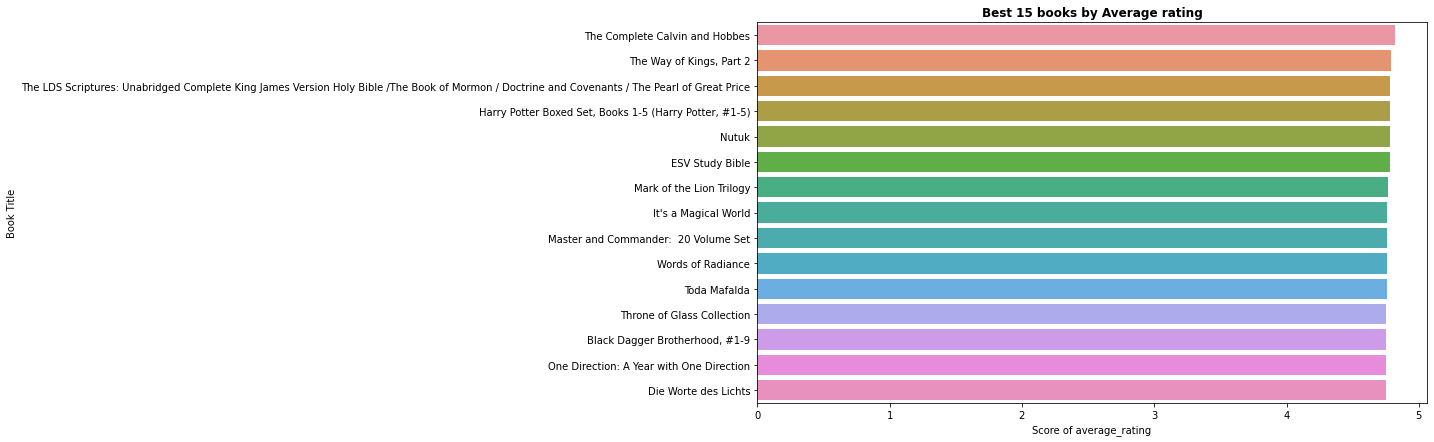

In [62]:
plot_books_by(book_sorted_ratings, 'average_rating', 15)

In [63]:
df[['first_genre']] = df.genre_and_votes.str.split(' ').str[0]
print(df.first_genre)

0                     Young
1                 Christian
2                 Christian
3                  Thriller
4         Economics-Finance
                ...        
49354    Romance-Historical
49355            Nonfiction
49356               Fiction
49357                 Young
49358             Biography
Name: first_genre, Length: 49359, dtype: object


In [64]:
df['first_genre'].unique()

array(['Young', 'Christian', 'Thriller', 'Economics-Finance', 'Romance',
       'Fiction', 'Sequential', 'Poetry', 'Fantasy', 'Mystery', 'Art',
       'Nonfiction', 'History', 'Historical-Historical', 'Horror',
       'Fantasy-Paranormal', 'Romance-Paranormal', 'World', 'Plays',
       'Childrens-Picture', 'Short', 'Romance-Romantic', 'Classics',
       'Erotica-BDSM', 'Womens', 'Cultural-Africa', 'Fantasy-Urban',
       'New', 'Business', 'Philosophy', 'Science', 'Childrens-Middle',
       'Paranormal-Vampires', 'Childrens', 'Novels', 'Religion',
       'European', 'Autobiography-Memoir', 'Romance-Historical', 'Asian',
       'Realistic', 'Dark', 'LGBT', 'Romance-M', 'Economics', 'Politics',
       'Humor', 'Cultural-India', 'Culture-Film', 'Self', 'Food', 'Adult',
       'Sports-Sports', 'Mystery-Crime', 'Media', 'Music', 'Fat-Fat',
       'Writing-Essays', 'LGBT-Gay', 'Fairy', 'Fantasy-Magic',
       'Horror-Zombies', 'Spirituality', 'Cultural-Japan',
       'Romance-Christian', 'An

In [65]:
df['new_genre'] = [(x.split("-")[0]) for x in df['first_genre']]

In [66]:
df['new_genre'].nunique()

183

In [67]:
fantasy = ['Fantasy', 'Fairy', 'mythology', 'Fairies', 'Magical']
history = ['History', 'Historical', 'Roman', 'Retellings']
religion = ['Christian','Religion','Spirituality', 'Christianity','Prayer', 'Biblical', 'Church','Lds' ]
arts = ['Art','Cultural','Culture', 'Design', 'Couture', 'Crafts']
young = ['Young', 'Childrens', 'Kids']
international = ['Asian', 'European','American','African','World' ]
education = ['Science','Pseudoscience','Psychology','Computer','Academic','Education','Textbooks','Computers','Sci','Teaching','School','Nobel' ]
environment = ['Nature','Environment','Gardening']
medical =['Biology','Neuroscience','Medical', 'Health', 'Illness']
sports = ['Soccer', 'Gamebooks', 'Football','Games','Sports']
superheroes = ['Dc','Superheroes','Shapeshifters','Comics']
adult_rom = ['Erotica','LGBT','GLBT','Gay','Pornography']
romance = ['Romance', 'Romantic', 'Love','Amish']
finance = ['Buisness', 'Economics', 'Business']
horror = ['Horror', 'Paranormal','Dark','Gothic','Occult']
food = ['Food', 'Alcohol', 'Fat']
action = ['Action', 'Apocalyptic', 'Military', 'Dungeons', 'War','Spy','Combat','Warfare']
thriller = ['Crime', 'Suspense']
language = ['Language', 'Linguistics', 'Writing']
relationship = ['Family', 'Marriage', 'Relationships']

In [70]:
count=0
for x in range(df.shape[0]):
  g = df.loc[x]['new_genre']
  #print(x)
  if g in religion:
    df.loc[x,('new_genre')] = 'Religion'
  elif g in fantasy:
    #print(x,g)
    df.loc[x,('new_genre')] = 'Fantasy'
  elif g in food:
    df.loc[x,('new_genre')] = 'Food'
  elif g in action:
    df.loc[x,('new_genre')] = 'Action'
  elif g in thriller:
    df.loc[x,('new_genre')] = 'Thriller'
  elif g in language:
    df.loc[x,('new_genre')] = 'Language'
  elif g in relationship:
    df.loc[x,('new_genre')] = 'Relationship'
  elif g in history:
    df.loc[x,('new_genre')] = 'History'
  elif g in arts:
    df.loc[x,('new_genre')] = 'Arts'
  elif g in young:
    df.loc[x,('new_genre')] = 'Young'
  elif g in international:
    df.loc[x,('new_genre')] = 'International'
  elif g in education:
    df.loc[x,('new_genre')] = 'Education'
  elif g in medical:
    df.loc[x,('new_genre')] = 'Medical'
  elif g in sports:
    df.loc[x,('new_genre')] = 'Sports'
  elif g in superheroes:
    df.loc[x,('new_genre')] = 'Superhero'
  elif g in adult_rom:
    df.loc[x,('new_genre')] = 'AdultRomance'
  elif g in environment:
    df.loc[x,('new_genre')] = 'Environment'
  elif g in horror:
    df.loc[x,('new_genre')] = 'Horror'
  elif g in finance:
    df.loc[x,('new_genre')] = 'Finance'
  elif g in romance:
    df.loc[x,('new_genre')] = 'Romance'

     

In [71]:
df.loc[0]['new_genre']
df.shape[0]

49359

In [72]:
df['new_genre'].unique()


array(['Young', 'Religion', 'Thriller', 'Finance', 'Romance', 'Fiction',
       'Sequential', 'Poetry', 'Fantasy', 'Mystery', 'Arts', 'Nonfiction',
       'History', 'Horror', 'International', 'Plays', 'Short', 'Classics',
       'AdultRomance', 'Womens', 'New', 'Philosophy', 'Education',
       'Novels', 'Autobiography', 'Realistic', 'Politics', 'Humor',
       'Self', 'Food', 'Adult', 'Sports', 'Media', 'Music', 'Language',
       'Animals', 'Contemporary', 'Inspirational', 'Biography', 'Medical',
       'Literature', 'Action', 'Harlequin', 'Race', 'Aviation', 'Travel',
       'Polyamorous', 'Parenting', 'Westerns', 'Epic', 'Anthropology',
       'Category', 'Leadership', 'Urban', 'Reference', 'Feminism',
       'Sociology', 'Holiday', 'Environment', 'Modern', 'Adventure',
       'Relationship', 'Anthologies', 'Mythology', 'Drama', 'Esoterica',
       'Book', 'Folklore', 'Sexuality', 'Law', 'Northern', 'Mental',
       'Superhero', 'Architecture', 'Diary', 'Unfinished', 'Fan',
      

In [73]:
df['new_genre'].nunique()

107

In [74]:
df['new_genre'].value_counts(ascending=True)

Menage              1
Pulp                1
Polyamory           1
Political           1
North               1
Futuristic          1
Tragedy             1
Social              1
Female              1
United              1
Productivity        1
Speculative         2
Gender              2
Manga               2
Eastern             2
Mental              2
Nurses              2
Pop                 2
Folk                2
Harlequin           2
Artificial          2
Folklore            3
Aviation            3
Disability          3
Currency            3
Own                 3
Northern            4
Central             4
True                4
Modern              5
Diary               5
Criticism           5
Race                5
Space               5
Novella             5
Witchcraft          5
Sexuality           6
Humanities          7
Architecture        7
Law                 8
Unfinished          8
Category            8
Epic                9
Fan                10
Audiobook          10
Inspiratio

In [132]:
 # Get the count of each value
value_counts = df['new_genre'].value_counts()

 # Select the values where the count is less than 3 (or 5 if you like)
to_remove = value_counts[value_counts <= 50].index

 # Keep rows where the city column is not in to_remove
df = df[~df.new_genre.isin(to_remove)]

In [133]:
df['new_genre'].value_counts()


16    6991
18    6231
47    4614
59    4526
21    3408
35    2657
13    2437
32    2121
23    1722
49    1681
46    1679
10    1176
40     974
54     741
7      709
38     610
50     512
25     507
36     456
9      443
2      328
58     322
19     318
34     315
24     259
39     257
48     227
52     209
29     192
41     192
8      187
4      178
1      163
11     157
55     145
31     137
3      121
43     118
0      109
26     104
28     100
20      98
22      79
57      73
30      70
17      63
37      61
56      60
Name: new_genre, dtype: int64

In [134]:
#df.loc[df['title'].str.contains(r'[^\x00-\x7F]+') == False]

In [135]:
from sklearn.preprocessing import LabelEncoder

feat = ['new_genre']
for x in feat:
    le = LabelEncoder()
    le.fit(list(df[x].values))
    df[x] = le.transform(list(df[x]))

In [136]:
df['new_genre'].unique()

array([47, 36, 42, 14, 37, 13, 39, 33, 11, 26,  5, 28, 16, 18, 20, 32, 40,
        8,  2, 46, 27, 31, 10, 29,  6, 35, 34, 19, 38, 15,  1, 41, 23, 25,
       21,  4,  9,  7, 24, 22,  0, 43, 30, 45, 44, 12, 17,  3])

In [137]:
le.inverse_transform([0])[0]

0

In [138]:
#word tokenizer to split words into meaningful units
def tokenization(text):
    lst=[]
    lst=text.split()
    return lst

In [139]:
#converting text to lowercase 
def lowercasing(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst    

In [140]:
#removing any kind of punctuation marks, if present
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
      

In [141]:
#removing numbers
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]
    for i in lst:
        for j in s.digits:    
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i!='':
            new_lst.append(i)
    return new_lst


In [142]:
#removing words that don't carry any meaningful importance like- 'how','when',etc
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst  

In [143]:
#removing spaces
def remove_spaces(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst


In [144]:
#lemmatizer
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst

In [145]:
df.title.apply(tokenization)
df.title.apply(lowercasing)
df.title.apply(remove_punctuations)
df.title.apply(remove_numbers)
df.title.apply(remove_stopwords)
df.title.apply(remove_spaces)
df.title.apply(lemmatzation)


0                     [I, n, n, e, r,  , C, i, r, c, l, e]
1        [A,  , T, i, m, e,  , t, o,  , E, m, b, r, a, ...
2                                 [T, a, k, e,  , T, w, o]
3                              [R, e, l, i, q, u, a, r, y]
4        [T, h, e,  , M, i, l, l, i, o, n, a, i, r, e, ...
                               ...                        
49354    [T, h, e,  , S, t, r, a, n, g, e, r,  , I,  , ...
49355    [T, h, e,  , O, p, p, o, s, i, t, e,  , o, f, ...
49356    [S, a, d, a, k, o,  , w, i, l, l,  , l, e, b, ...
49357                    [C, o, n, f, e, s, s, i, o, n, s]
49358    [G, o, i, n, g,  , R, o, g, u, e, :,  , A, n, ...
Name: title, Length: 48837, dtype: object

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, max_features=70000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w+', use_idf=True, 
                            smooth_idf=True, sublinear_tf=True, stop_words = 'english')
vectors = vectorizer.fit_transform(df['title'])
vectors.shape

(48837, 11468)

In [147]:
#import sklearn.cross_validation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
train_x, test_x, train_y, test_y = train_test_split(vectors, df['first_genre'], test_size=0.02)

In [148]:
print(vectors)

  (0, 2053)	0.6879946834124634
  (0, 5226)	0.725715726435761
  (1, 3408)	0.8230634101236489
  (1, 10270)	0.5679494897573465
  (4, 11071)	0.5017701346694284
  (4, 8776)	0.17692717512549141
  (4, 577)	0.3084409938892658
  (4, 9011)	0.31704346688178964
  (4, 9926)	0.4502400557252844
  (4, 3120)	0.3575018343491881
  (4, 6650)	0.43674641464993536
  (5, 9187)	0.8405161420893897
  (5, 1305)	0.5417865030500194
  (6, 9990)	1.0
  (7, 5486)	1.0
  (8, 4260)	0.744291296930605
  (8, 844)	0.667855122997015
  (9, 11346)	1.0
  (10, 8776)	1.0
  (11, 6533)	0.7879708785455818
  (11, 1352)	0.615712509669979
  (12, 800)	0.4455900587886231
  (12, 7326)	0.5428927571138973
  (12, 9593)	0.7118405395747157
  (13, 9132)	0.4656731586629897
  :	:
  (48826, 2736)	0.702412254450625
  (48826, 4987)	0.7117703455452398
  (48827, 750)	0.7613016326414747
  (48827, 9763)	0.5718906740853528
  (48827, 8776)	0.30555012850860647
  (48828, 2823)	0.8345421872970358
  (48828, 4491)	0.5509440421871165
  (48829, 3743)	1.0
  (48830,

In [149]:
print (train_x.shape)
print (train_y.shape)
print (test_x.shape)
print (test_y.shape)

(47860, 11468)
(47860,)
(977, 11468)
(977,)


In [150]:
# freq_dist={}
# for i in train_x.head(20):
#     x=i.split()
#     for j in x:
#         if j not in freq_dist.keys():
#             freq_dist[j]=1
#         else:
#             freq_dist[j]+=1
# freq_dist

In [155]:
clf = MultinomialNB(alpha=0.05)
clf.fit(train_x, train_y)
pred = clf.predict(test_x)
print (metrics.f1_score(test_y, pred, average='macro'))
print (metrics.accuracy_score(test_y, pred))


0.09534144141112127
0.28556806550665303


In [168]:
text = ['adventure']
text[0] = text[0].lower()
#text = list(text)
s = (vectorizer.transform(text))
#s = vectorizer.fit_transform(df)
print (s.shape)
d = (clf.predict(s))
print(d)

(1, 11468)
['Mystery']
